In [191]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use("default")
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import preprocessing
from sklearn.svm import SVC

pd.options.mode.chained_assignment = None

In [192]:
df = pd.read_csv("/Users/guillaumedenis/Programmation/Datasets/fish.csv")

print(df.info(), "\n")
print(df.isnull().sum(), "\n")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   length  1000 non-null   float64
 1   weight  1000 non-null   float64
 2   type    1000 non-null   object 
dtypes: float64(2), object(1)
memory usage: 23.6+ KB
None 

length    0
weight    0
type      0
dtype: int64 

            length       weight
count  1000.000000  1000.000000
mean      5.002707     4.797289
std       2.881534     2.900556
min       0.006546     0.001260
25%       2.538484     2.239865
50%       4.954206     4.671798
75%       7.529288     7.252901
max       9.993348     9.995241


<AxesSubplot:xlabel='length', ylabel='weight'>

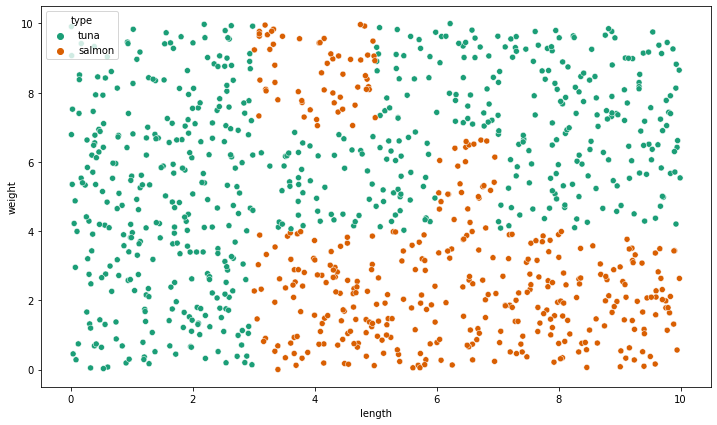

In [193]:
# Représentation graphique
plt.figure(figsize = (12,7))
sns.scatterplot(x = "length", y = "weight", hue = "type", palette = "Dark2", data = df)

In [194]:
# On change la variable Y en valeur numérique
df["type"] = df["type"].map(lambda x: 1 if x== "salmon" else 0)

In [195]:
def get_entropy(data):
    p = np.mean(data["type"])
    if p==0 or p==1:
        return 0
    return -p*np.log2(p) - (1-p)*np.log2(1-p)

In [196]:
def get_entropy_from_split(df, feature, value):
    left_df = df[df[feature] < value]
    right_df = df[df[feature] >= value]
    
    
    entropy_left = get_entropy(left_df)
    entropy_right = get_entropy(right_df)
    
    ratio_left = left_df.shape[0] / df.shape[0]
    ratio_right = right_df.shape[0] / df.shape[0]
    
    return ratio_left * entropy_left + ratio_right * entropy_right

In [197]:
features = df.columns[0:2].to_list()
best_param = {"entropy": np.inf, "feature": None, "value": None}
step = 0.1

for feature in features:
    min_value = df[feature].min()
    max_value = df[feature].max()
    
    i = min_value
    
    while i < max_value:
        cur_entropy = get_entropy_from_split(df, feature, i)
        
        if best_param["entropy"] > cur_entropy:
            best_param["feature"] = feature
            best_param["entropy"] = cur_entropy
            best_param["value"] = i
        i += step
        
print(best_param)
    

{'entropy': 0.6843553171032571, 'feature': 'length', 'value': 3.0065456626365483}


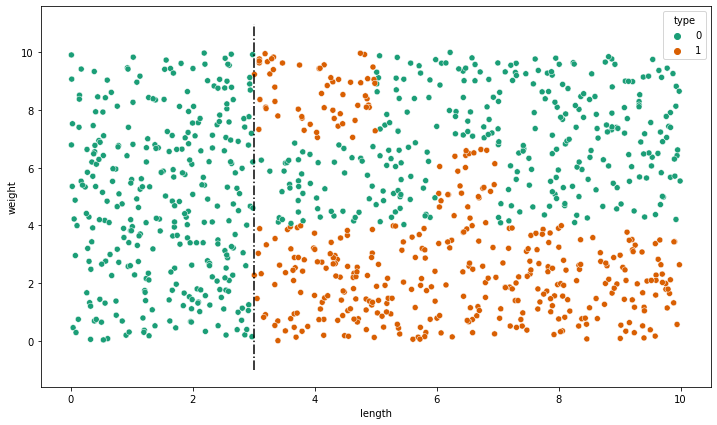

In [198]:
# Représentation graphique
plt.figure(figsize = (12,7))
sns.scatterplot(x = "length", y = "weight", hue = "type", palette = "Dark2", data = df)
plt.plot([best_param["value"], best_param["value"]], [df["weight"].min()-1, df["weight"].max()+1],
        linestyle = "-.", color="black")